# Importing Libs:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras import datasets,layers,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,GlobalAveragePooling2D
from zipfile import ZipFile
import os,glob
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from keras.models import Model
from keras.layers import BatchNormalization
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Loading the DataSet:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [ ]:
!kaggle competitions download -c ai-showdown-procom24-final-round

ai-showdown-procom24-final-round.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
file = "/content/ai-showdown-procom24-final-round.zip"
with ZipFile(file,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
df = pd.read_csv("/content/Train.csv")

# Exploaring the DataSet:

In [ ]:
df.head()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,39,1,9991,0,19,133.1,1,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
1,2,1,7,1,9991,0,40,130.0,1,38,...,5,10,10,5,13.600000,0,8.9,1.4,3.51,Dropout
2,3,1,15,1,9238,1,1,140.0,26,19,...,0,6,7,6,13.428571,0,11.1,0.6,2.02,Graduate
3,4,1,39,1,9085,1,1,140.0,1,3,...,0,6,19,1,12.000000,0,12.4,0.5,1.79,Dropout
4,5,1,43,1,9853,1,1,130.0,1,2,...,13,19,19,19,12.210526,0,12.4,0.5,1.79,Graduate


In [ ]:
df.shape

(3318, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              3318 non-null   int64  
 1   Marital status                                  3318 non-null   int64  
 2   Application mode                                3318 non-null   int64  
 3   Application order                               3318 non-null   int64  
 4   Course                                          3318 non-null   int64  
 5   Attendance Type                                 3318 non-null   int64  
 6   Previous qualification                          3318 non-null   int64  
 7   Previous qualification (grade)                  3318 non-null   float64
 8   Nationality                                     3318 non-null   int64  
 9   Mother's qualification                   

In [ ]:
df.describe()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,...,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000
mean,1659.500000,1.172092,18.581374,1.723930,8873.743219,0.890898,4.623568,132.647257,1.881555,19.356841,...,0.131404,0.524412,6.233273,8.052441,4.454189,10.279922,0.151296,11.595298,1.237402,-0.009873
std,957.968423,0.580233,17.497883,1.298769,2023.618822,0.311814,10.286268,13.240050,6.927778,15.637874,...,0.665419,1.873407,2.163323,3.913709,3.007003,5.194381,0.764381,2.660445,1.390734,2.265840
min,1.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,830.250000,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.833333,0.000000,9.400000,0.300000,-1.700000
50%,1659.500000,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.250000,0.000000,11.100000,1.400000,0.320000
75%,2488.750000,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,13.900000,2.600000,1.790000
max,3318.000000,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,43.000000,...,12.000000,18.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

<Axes: xlabel='Target', ylabel='count'>

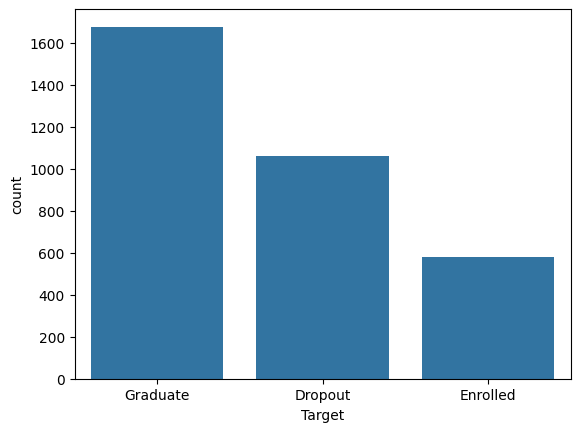

In [ ]:
sns.countplot(x='Target',data=df)

In [ ]:
df['Target'].value_counts()

Graduate    1676
Dropout     1061
Enrolled     581
Name: Target, dtype: int64

In [ ]:
df_for_imbalance = df
df2 = df

# Checking for Null

In [ ]:
df.isnull().sum()

ID                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Attendance Type                                   0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

# **Label Encoding**

In [ ]:
encoder = LabelEncoder()

In [ ]:
df.head()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,39,1,9991,0,19,133.1,1,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
1,2,1,7,1,9991,0,40,130.0,1,38,...,5,10,10,5,13.600000,0,8.9,1.4,3.51,Dropout
2,3,1,15,1,9238,1,1,140.0,26,19,...,0,6,7,6,13.428571,0,11.1,0.6,2.02,Graduate
3,4,1,39,1,9085,1,1,140.0,1,3,...,0,6,19,1,12.000000,0,12.4,0.5,1.79,Dropout
4,5,1,43,1,9853,1,1,130.0,1,2,...,13,19,19,19,12.210526,0,12.4,0.5,1.79,Graduate


In [ ]:
df.tail()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3313,3314,1,43,1,9773,1,1,122.0,1,1,...,0,6,7,6,12.000000,0,7.6,2.6,0.32,Graduate
3314,3315,1,1,1,9238,1,1,133.0,1,19,...,0,6,7,5,11.800000,0,8.9,1.4,3.51,Dropout
3315,3316,1,17,5,9773,1,1,146.0,1,1,...,0,6,8,6,13.625000,0,7.6,2.6,0.32,Graduate
3316,3317,1,1,2,9773,1,1,116.0,1,1,...,0,6,7,6,13.142857,0,13.9,-0.3,0.79,Dropout
3317,3318,1,44,1,9085,1,39,130.0,1,37,...,0,6,7,0,0.000000,0,11.1,0.6,2.02,Dropout


<Axes: xlabel='Target', ylabel='count'>

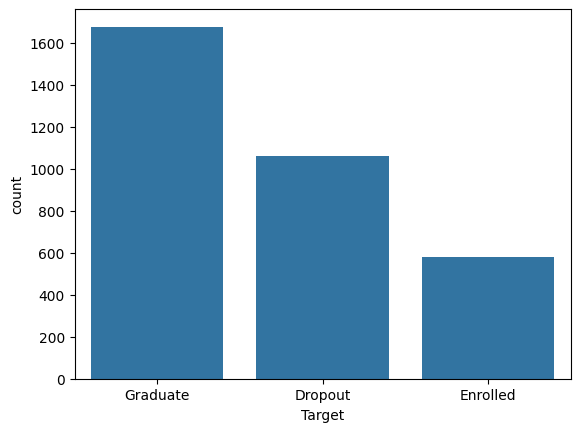

In [ ]:
sns.countplot(x='Target',data=df)

In [ ]:
encoder.fit(df['Target'])
df['Target'] = encoder.transform(df['Target'])

In [ ]:
df.head()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,39,1,9991,0,19,133.1,1,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,2
1,2,1,7,1,9991,0,40,130.0,1,38,...,5,10,10,5,13.600000,0,8.9,1.4,3.51,0
2,3,1,15,1,9238,1,1,140.0,26,19,...,0,6,7,6,13.428571,0,11.1,0.6,2.02,2
3,4,1,39,1,9085,1,1,140.0,1,3,...,0,6,19,1,12.000000,0,12.4,0.5,1.79,0
4,5,1,43,1,9853,1,1,130.0,1,2,...,13,19,19,19,12.210526,0,12.4,0.5,1.79,2


In [ ]:
df.tail()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3313,3314,1,43,1,9773,1,1,122.0,1,1,...,0,6,7,6,12.000000,0,7.6,2.6,0.32,2
3314,3315,1,1,1,9238,1,1,133.0,1,19,...,0,6,7,5,11.800000,0,8.9,1.4,3.51,0
3315,3316,1,17,5,9773,1,1,146.0,1,1,...,0,6,8,6,13.625000,0,7.6,2.6,0.32,2
3316,3317,1,1,2,9773,1,1,116.0,1,1,...,0,6,7,6,13.142857,0,13.9,-0.3,0.79,0
3317,3318,1,44,1,9085,1,39,130.0,1,37,...,0,6,7,0,0.000000,0,11.1,0.6,2.02,0


In [ ]:
df['Target'].value_counts()
#Enrolled = 1, Graduate = 2, Dropout = 0

2    1676
0    1061
1     581
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

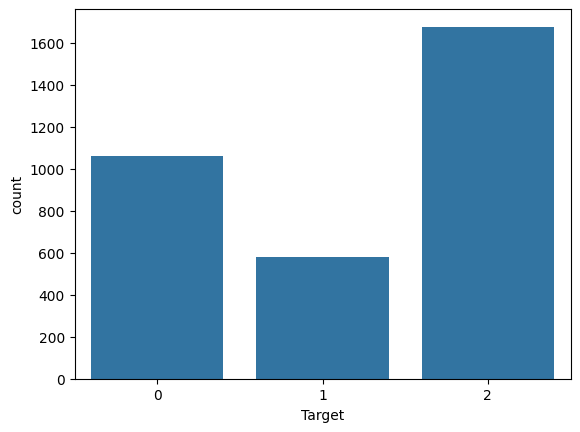

In [ ]:
sns.countplot(x='Target',data=df)

# Check Correlation

In [ ]:
corr = df.corr()

<Axes: >

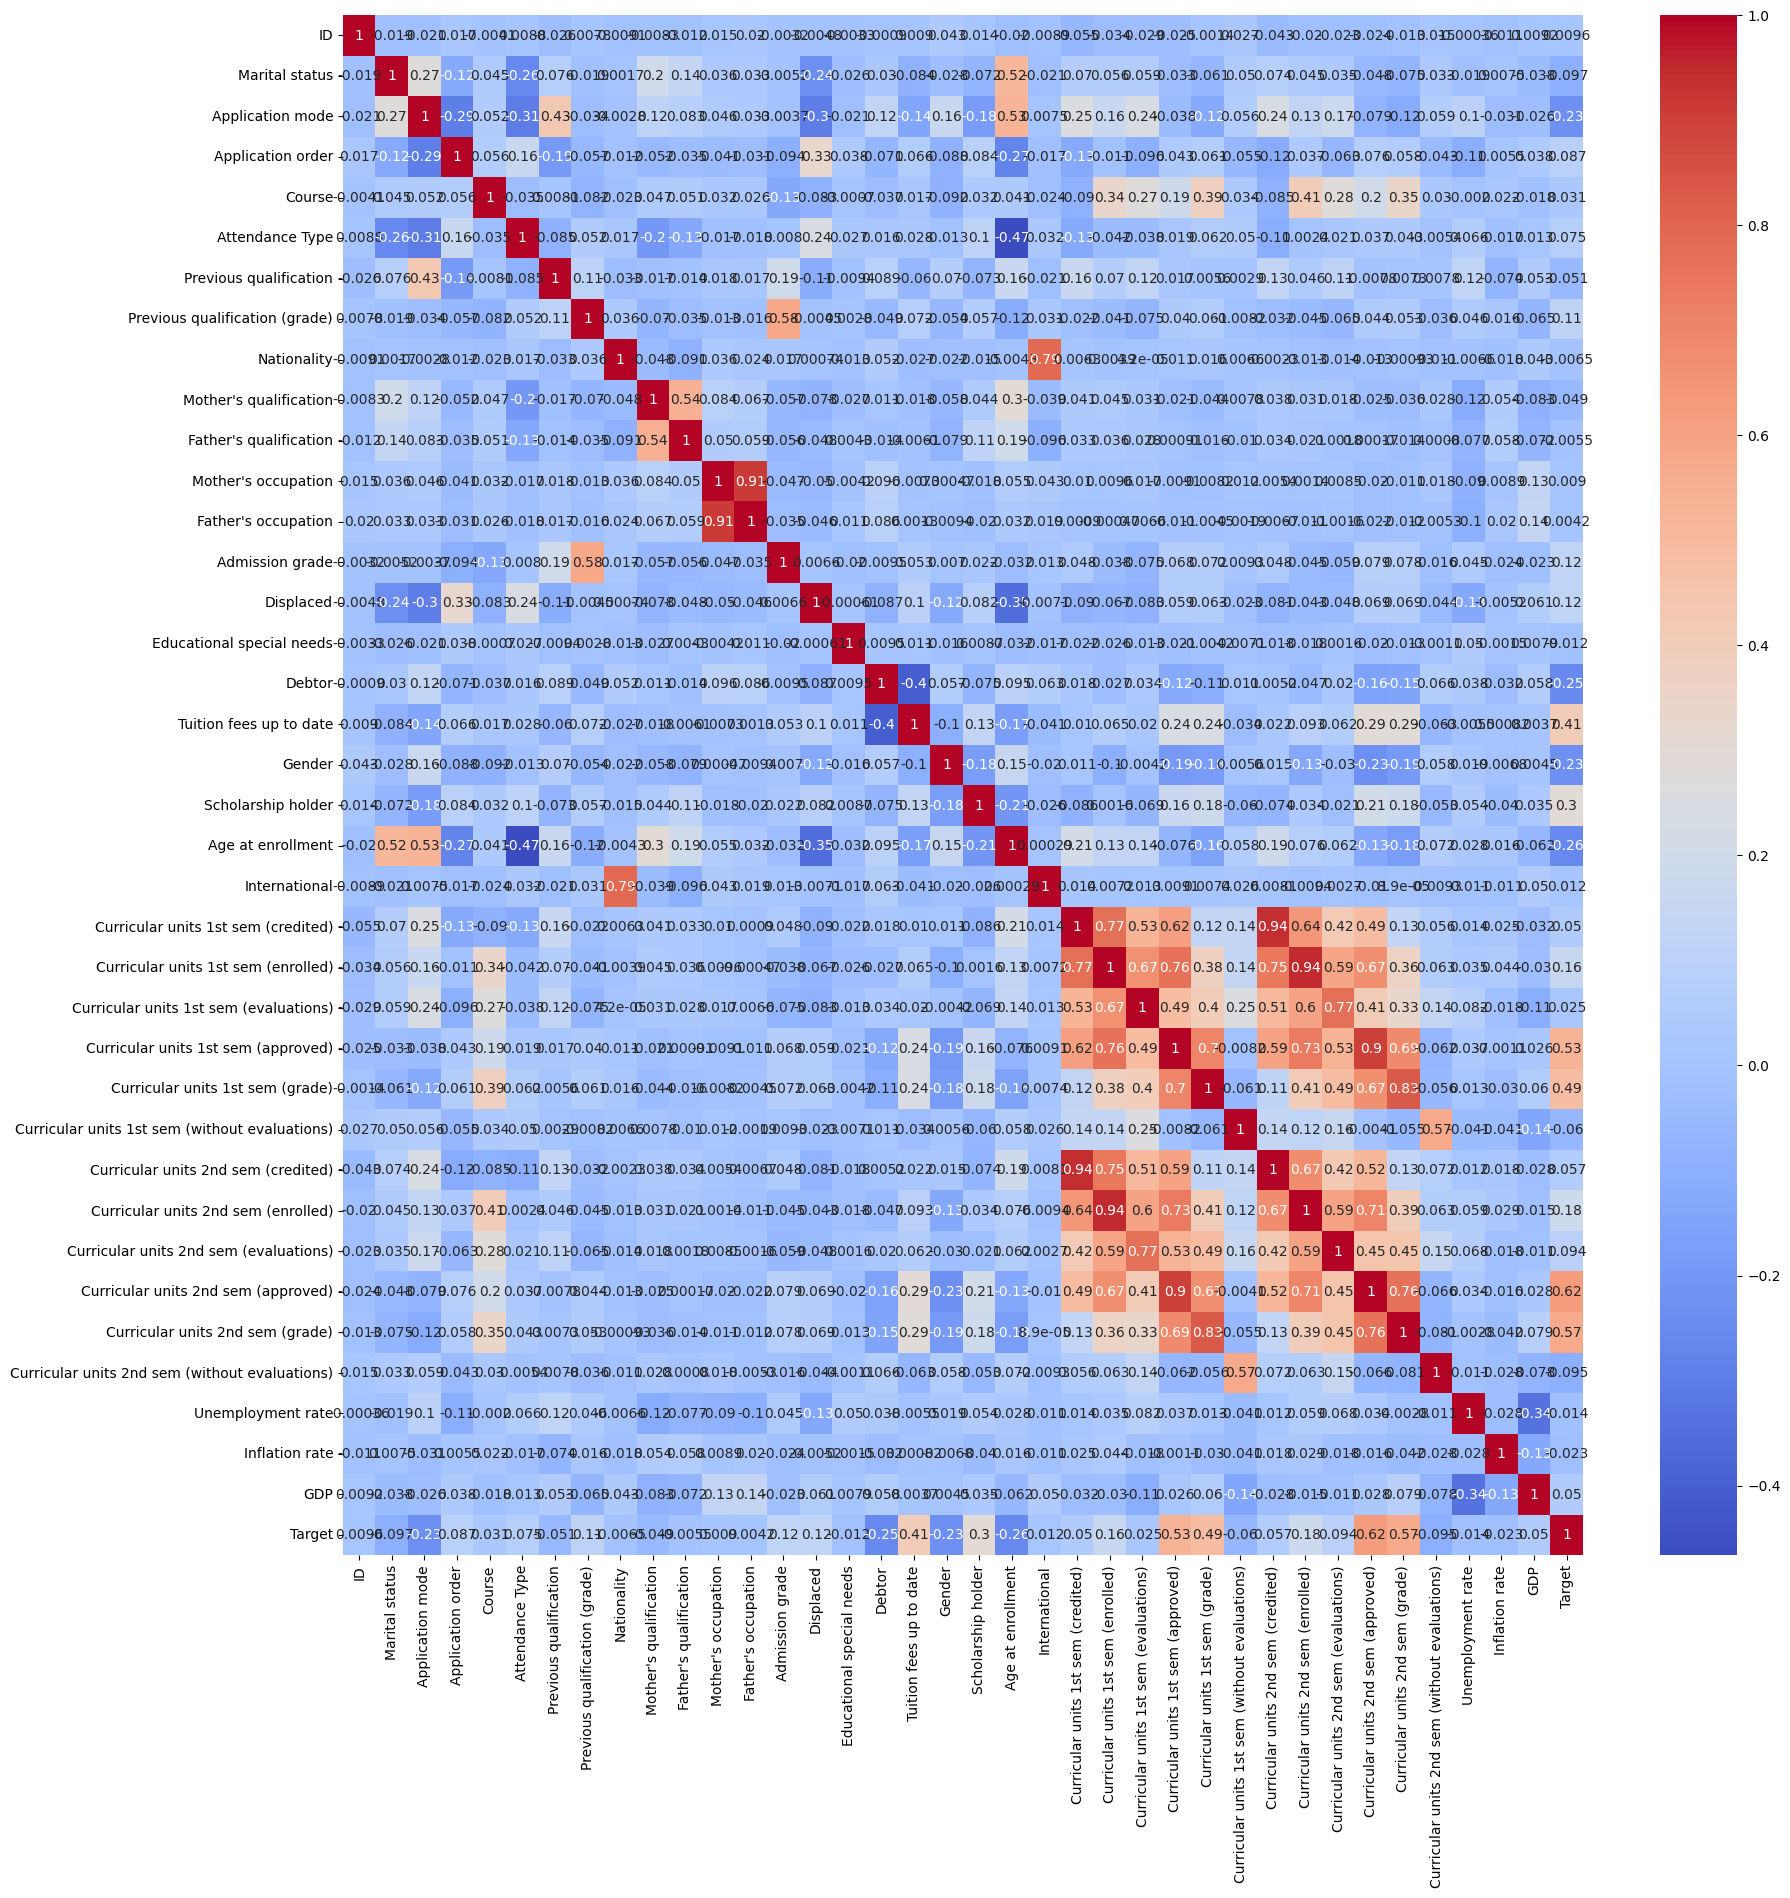

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot = True , cmap = "coolwarm")

# Checking for Feature Importance:

In [ ]:
x = df.drop(['Target'],axis=1)
y = df['Target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(x_train, y_train)
X_train_fs = fs.transform(x_train)
X_test_fs = fs.transform(x_test)

In [ ]:
df.shape

(3318, 38)

Feature 0: 0.000000
Feature 1: 0.010978
Feature 2: 0.049666
Feature 3: 0.006905
Feature 4: 0.082967
Feature 5: 0.009227
Feature 6: 0.025396
Feature 7: 0.027923
Feature 8: 0.000000
Feature 9: 0.036881
Feature 10: 0.012399
Feature 11: 0.029968
Feature 12: 0.022433
Feature 13: 0.033961
Feature 14: 0.002087
Feature 15: 0.000166
Feature 16: 0.006191
Feature 17: 0.087118
Feature 18: 0.035771
Feature 19: 0.057361
Feature 20: 0.054062
Feature 21: 0.001898
Feature 22: 0.004154
Feature 23: 0.036937
Feature 24: 0.090010
Feature 25: 0.243244
Feature 26: 0.168421
Feature 27: 0.008634
Feature 28: 0.011332
Feature 29: 0.060366
Feature 30: 0.083772
Feature 31: 0.308555
Feature 32: 0.212281
Feature 33: 0.000000
Feature 34: 0.004578
Feature 35: 0.000000
Feature 36: 0.000000


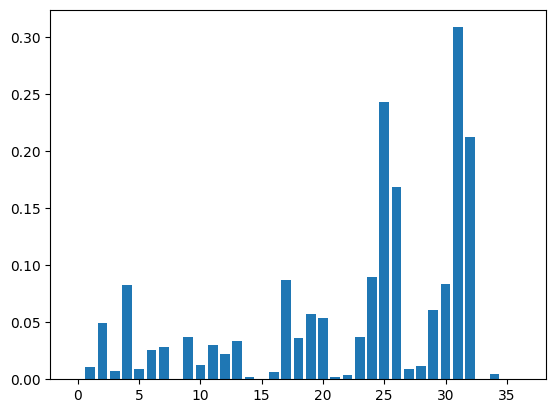

In [ ]:
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
df.columns

Index(['ID', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Attendance Type', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (g

In [ ]:
#drop -> 0,1,3,5,8,14,15,21,22,23,27,33,34,36
droped_cols = ['ID','Marital status','Application order','Attendance Type','Nationality',"Mother's qualification","Educational special needs","International","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (without evaluations)","Unemployment rate"]
df_dropped = df

In [ ]:
df_dropped.drop(columns=droped_cols,inplace=True,axis=1)

In [ ]:
x_dropped = df_dropped.drop(['Target'],axis=1)
y_dropped = df_dropped['Target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_dropped,y_dropped,test_size=0.2,random_state=42)

# Modeling the data

# **Scaling The Data:**

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train.head()

,Application mode,Course,Previous qualification,Previous qualification (grade),Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Debtor,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Inflation rate,GDP
2740,1,9147,1,128.0,37,9,9,116.5,0,0,...,9,3,11.666667,0,5,15,2,11.000000,2.6,0.32
468,44,9003,39,140.0,19,4,4,140.0,1,0,...,17,2,12.500000,0,6,10,0,0.000000,0.3,-0.92
2067,44,9119,39,150.0,3,5,2,150.0,0,0,...,16,0,0.000000,0,5,12,2,10.500000,3.7,-1.70
2712,44,9070,39,120.0,19,5,8,119.8,0,0,...,7,2,12.000000,5,9,10,7,12.142857,0.5,1.79
535,53,9238,42,140.0,37,9,10,136.9,1,0,...,10,9,12.777778,4,9,9,9,13.222222,1.4,3.51


In [ ]:
x_test.head()

,Application mode,Course,Previous qualification,Previous qualification (grade),Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Debtor,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Inflation rate,GDP
1292,44,9085,39,130.0,1,6,4,130.0,1,0,...,12,5,12.800000,0,6,19,2,11.500000,0.5,1.79
2318,43,8014,3,133.1,9,90,90,130.0,0,0,...,16,10,11.800000,3,7,7,7,13.285714,2.6,0.32
2643,7,9991,40,120.0,37,9,7,120.0,0,0,...,7,5,11.600000,0,5,8,5,12.333333,0.5,1.79
807,1,9238,1,126.0,19,0,2,121.5,1,0,...,8,6,11.333333,0,6,6,6,11.666667,2.6,0.32
3242,39,9085,12,133.1,39,5,3,140.0,1,1,...,7,0,0.000000,0,6,6,0,0.000000,-0.3,0.79


In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-0.99991715,  0.1309186 , -0.35361694, ...,  0.13688014,
         0.9925655 ,  0.1427551 ],
       [ 1.45501358,  0.05916065,  3.32905301, ..., -1.97925183,
        -0.66561297, -0.40216322],
       [ 1.45501358,  0.11696567,  3.32905301, ...,  0.04069232,
         1.78560738, -0.74493442],
       ...,
       [-0.08645455,  0.39153948, -0.35361694, ...,  0.56972531,
         0.1274289 ,  0.76677447],
       [-0.99991715,  0.17626564, -0.35361694, ...,  0.29719316,
         0.1274289 ,  0.76677447],
       [-0.99991715,  0.1309186 , -0.35361694, ...,  0.56010653,
        -0.52142354,  0.78874698]])

In [ ]:
x_test

array([[ 1.45501358,  0.10002282,  3.32905301, ...,  0.23306795,
        -0.52142354,  0.78874698],
       [ 1.39792217, -0.43367692, -0.15979221, ...,  0.57659587,
         0.9925655 ,  0.1427551 ],
       [-0.65736868,  0.55149991,  3.42596538, ...,  0.39338098,
        -0.52142354,  0.78874698],
       ...,
       [-0.08645455,  0.39153948, -0.35361694, ...,  0.71400704,
        -0.52142354,  0.78874698],
       [ 1.39792217,  0.17626564, -0.35361694, ...,  0.38844827,
         1.13675493, -1.78203702],
       [-0.99991715,  0.44286635, -0.35361694, ...,  0.48315628,
        -0.44932882,  0.88982054]])

In [ ]:
x_train.max()

9.222620835830456

In [ ]:
x_train.min()

-4.410761533200579

In [ ]:
x_test.max()

7.638291261849224

In [ ]:
x_test.min()

-4.410761533200579

# **SVC (On dropped data):**

In [ ]:
svc_best_model = SVC(C=0.1,kernel='linear')
svc_best_model.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred_svc_d= svc_best_model.predict(x_train)

In [ ]:
print(f"Training Data Accuracy for SVC: {accuracy_score(y_train,y_pred_svc_d)}")

Training Data Accuracy for SVC: 0.7803315749811605


In [ ]:
y_pred_svc_d_t = svc_best_model.predict(x_test)
print(f"Testing Data Accuracy for SVC: {accuracy_score(y_test,y_pred_svc_d_t)}")

Testing Data Accuracy for SVC: 0.7515060240963856


# **Decision Trees (on dropped data)**

In [ ]:
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=3)
dt_grid_search.fit(x_train, y_train)
print("Best Decision Tree parameters:", dt_grid_search.best_params_)
dt_best_model = dt_grid_search.best_estimator_

Best Decision Tree parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
y_pred_dt_d = dt_best_model.predict(x_train)

In [ ]:
print(f"Training Data Accuracy for DT: {accuracy_score(y_train,y_pred_dt_d)}")

Training Data Accuracy for DT: 0.7727957799547852


In [ ]:
y_pred_dt_d_t = dt_best_model.predict(x_test)
print(f"Testing Data Accuracy for DT: {accuracy_score(y_test,y_pred_dt_d_t)}")

Testing Data Accuracy for DT: 0.733433734939759


# **Random Forest:**

In [ ]:
rf_dropped = RandomForestClassifier()

In [ ]:
rf_dropped.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf_d = rf_dropped.predict(x_train)

In [ ]:
print(f"Training Data Accuracy for RF: {accuracy_score(y_train,y_pred_rf_d)}")

Training Data Accuracy for RF: 1.0


In [ ]:
y_pred_rf_d_t = rf_dropped.predict(x_test)
print(f"Testing Data Accuracy for RF: {accuracy_score(y_test,y_pred_rf_d_t)}")

Testing Data Accuracy for RF: 0.7454819277108434


# **Naive Bayes**

In [ ]:
# Naive Bayes
nb_param_grid = {}
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=3)
nb_grid_search.fit(x_train, y_train)
print("Best Naive Bayes parameters:", nb_grid_search.best_params_)
nb_best_model = nb_grid_search.best_estimator_

Best Naive Bayes parameters: {}


In [ ]:
y_pred_nb_d = nb_best_model.predict(x_train)

In [ ]:
print(f"Training Data Accuracy for NB: {accuracy_score(y_train,y_pred_nb_d)}")

Training Data Accuracy for NB: 0.7162773172569706


In [ ]:
y_pred_nb_d_t = nb_best_model.predict(x_test)
print(f"Testing Data Accuracy for NB: {accuracy_score(y_test,y_pred_nb_d_t)}")

Testing Data Accuracy for NB: 0.6882530120481928


# **Stacking Models**

In [ ]:
# Stacking Models
estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC())
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(x_train, y_train)
stacking_pred = stacking_model.predict(x_train)
stacking_pred_t = stacking_model.predict(x_test)
stacking_accuracy = accuracy_score(y_train, stacking_pred)
stacking_accuracy_t = accuracy_score(y_test, stacking_pred_t)
print("Stacking Models Accuracy on Training:", stacking_accuracy)
print("Stacking Models Accuracy on Testing:", stacking_accuracy_t)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Models Accuracy on Training: 0.9634513941220799
Stacking Models Accuracy on Testing: 0.7484939759036144


# **KNN**

In [ ]:
neighbor = np.arange(1,10,1)
for n in neighbor:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train,y_train)
  y_pred_knn = knn.predict(x_train)
  print(f"FOR NEIGHBOR = {n}")
  print(f"Training Data Accuracy for KNN (neighbors: {n}): {accuracy_score(y_train,y_pred_knn)}")
  print('\n')
  y_pred_knn_t = knn.predict(x_test)
  print(f"Testing Data Accuracy for KNN (neighbors: {n}): {accuracy_score(y_test,y_pred_knn_t)}")
  print('\n\n')

FOR NEIGHBOR = 1
Training Data Accuracy for KNN (neighbors: 1): 1.0


Testing Data Accuracy for KNN (neighbors: 1): 0.6460843373493976



FOR NEIGHBOR = 2
Training Data Accuracy for KNN (neighbors: 2): 0.8541823662396383


Testing Data Accuracy for KNN (neighbors: 2): 0.6159638554216867



FOR NEIGHBOR = 3
Training Data Accuracy for KNN (neighbors: 3): 0.8300678221552373


Testing Data Accuracy for KNN (neighbors: 3): 0.677710843373494



FOR NEIGHBOR = 4
Training Data Accuracy for KNN (neighbors: 4): 0.8225320271288621


Testing Data Accuracy for KNN (neighbors: 4): 0.7018072289156626



FOR NEIGHBOR = 5
Training Data Accuracy for KNN (neighbors: 5): 0.805199698568199


Testing Data Accuracy for KNN (neighbors: 5): 0.7078313253012049



FOR NEIGHBOR = 6
Training Data Accuracy for KNN (neighbors: 6): 0.7954031650339111


Testing Data Accuracy for KNN (neighbors: 6): 0.7033132530120482



FOR NEIGHBOR = 7
Training Data Accuracy for KNN (neighbors: 7): 0.7954031650339111


Testing Data A

# **Using XGBoost**

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)

In [ ]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.2,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xg = xgb_classifier.predict(x_train)

In [ ]:
print(f"Accuracy for training data: {accuracy_score(y_train,y_pred_xg)}")

Accuracy for training data: 0.9996232102486813


In [ ]:
y_pred_xg_t = xgb_classifier.predict(x_test)

In [ ]:
print(f"Accuracy for testing data: {accuracy_score(y_test,y_pred_xg_t)}")

Accuracy for testing data: 0.7545180722891566


# **Using Neural Nets**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
np.random.seed(1)
np.set_printoptions(precision=4, suppress=True)

In [ ]:
params = { 'hidden_layer_sizes' : [10,10],
    'activation' : 'tanh',
    'solver' : 'sgd',
    'alpha' : 0.0,
    'batch_size' : 10,
    'random_state' : 1,
    'tol' : 0.0001,
    'nesterovs_momentum' : False,
    'learning_rate' : 'constant',
    'learning_rate_init' : 0.01,
    'max_iter' : 1000,
    'shuffle' : True,
    'n_iter_no_change' : 90,
    'verbose' : False }

In [ ]:
net = MLPClassifier(**params)

In [ ]:
net.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0, batch_size=10,
              hidden_layer_sizes=[10, 10], learning_rate_init=0.01,
              max_iter=1000, n_iter_no_change=90, nesterovs_momentum=False,
              random_state=1, solver='sgd')

In [ ]:
acc_train = net.score(x_train, y_train)
print("\nAccuracy on train = %0.4f " % acc_train)
acc_test = net.score(x_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)


Accuracy on train = 0.8749 
Accuracy on test = 0.7078 


# **Using SVC for predictions:**

In [ ]:
df_test = pd.read_csv("/content/Test.csv")

In [ ]:
df_test.head()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,3319,1,17,5,9500,1,1,148.0,1,1,...,0,0,8,0,0,0.000000,0,12.4,0.5,1.79
1,3320,1,17,5,9500,1,1,137.0,1,1,...,0,0,8,8,8,14.900000,0,13.9,-0.3,0.79
2,3321,4,39,1,9853,1,1,143.0,1,37,...,0,0,7,9,5,12.600000,0,8.9,1.4,3.51
3,3322,1,17,1,9238,1,1,123.0,1,1,...,0,0,6,7,6,13.285714,0,11.1,0.6,2.02
4,3323,1,43,2,9147,1,1,131.0,1,19,...,0,0,5,10,1,14.000000,0,7.6,2.6,0.32


In [ ]:
cols = ['ID','Marital status','Application order','Attendance Type',"Mother's qualification","Educational special needs","International","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (without evaluations)","Unemployment rate", "GDP"]
x_final = df_test.drop(cols,axis=1)

In [ ]:
scaler = StandardScaler()
x_final = scaler.fit_transform(x_final)

In [ ]:
x_final.shape

(1106, 26)

In [ ]:
y_preds_sub_svc = svc_best_model.predict(x_final)

In [ ]:
df_test['Target'] = y_preds_sub_svc

In [ ]:
df_test.head()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,3319,1,17,5,9500,1,1,148.0,1,1,...,0,8,0,0,0.000000,0,12.4,0.5,1.79,0
1,3320,1,17,5,9500,1,1,137.0,1,1,...,0,8,8,8,14.900000,0,13.9,-0.3,0.79,0
2,3321,4,39,1,9853,1,1,143.0,1,37,...,0,7,9,5,12.600000,0,8.9,1.4,3.51,1
3,3322,1,17,1,9238,1,1,123.0,1,1,...,0,6,7,6,13.285714,0,11.1,0.6,2.02,1
4,3323,1,43,2,9147,1,1,131.0,1,19,...,0,5,10,1,14.000000,0,7.6,2.6,0.32,2


In [ ]:
#Enrolled = 1, Graduate = 2, Dropout = 0
d = {0 : "Dropout", 1: "Enrolled", 2: "Graduate"}
df_test['Target']=df_test['Target'].map(d)

In [ ]:
df_test.head()

,ID,Marital status,Application mode,Application order,Course,Attendance Type,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,3319,1,17,5,9500,1,1,148.0,1,1,...,0,8,0,0,0.000000,0,12.4,0.5,1.79,Dropout
1,3320,1,17,5,9500,1,1,137.0,1,1,...,0,8,8,8,14.900000,0,13.9,-0.3,0.79,Dropout
2,3321,4,39,1,9853,1,1,143.0,1,37,...,0,7,9,5,12.600000,0,8.9,1.4,3.51,Enrolled
3,3322,1,17,1,9238,1,1,123.0,1,1,...,0,6,7,6,13.285714,0,11.1,0.6,2.02,Enrolled
4,3323,1,43,2,9147,1,1,131.0,1,19,...,0,5,10,1,14.000000,0,7.6,2.6,0.32,Graduate


In [ ]:
df_test.shape

(1106, 38)

In [ ]:
df_test.columns

Index(['ID', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Attendance Type', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (g

In [ ]:
drops = ['Marital status','Application mode','Course','Attendance Type','Application order','Previous qualification','Previous qualification (grade)', 'Nationality',"Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation", 'Admission grade','Displaced', 'Educational special needs', 'Debtor','Tuition fees up to date', 'Gender', 'Scholarship holder','Age at enrollment', 'International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate','Inflation rate', 'GDP']
x_final = df_test.drop(drops,axis=1)

In [ ]:
 x_final.to_csv('/content/prediction3_net.csv',index=False)